In [27]:
import os
from glob import glob

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# glob 사용
data_paths = glob('../dataset/mnist/training/2/*.png')
print(len(data_paths))

# tensorflow 도 같은 기능
data_paths_tf = tf.io.matching_files('../dataset/mnist/training/2/*.png')
print(len(data_paths_tf))


5958
5958


## Load Image

(28, 28, 1)


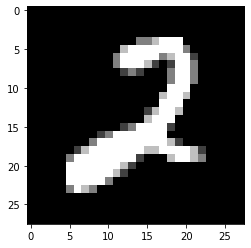

In [28]:
# Load image
gfile = tf.io.read_file(data_paths_tf[0])
image = tf.io.decode_image(gfile)
print(image.shape)

# imshow 할때는 차원 줄여서 
plt.imshow(image[:,:,0],'gray')

## Set Data Generator
- keras 의 DataGenerator 사용

--- 변환 전 image shape (1, 28, 28, 1)
--- 변환 후 image shape (1, 28, 28, 1)


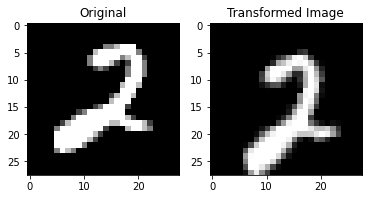

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 Generator 만들기
datagen = ImageDataGenerator(
    rotation_range=20, # 회전
    width_shift_range=0.2, # 왼 오른쪽 shift 랜덤
    height_shift_range=0.2, # 위쪽 shift
    horizontal_flip=True # 수평으로 뒤집기
)

# DataGenerator 는 4차원으로 넣어주어야 함
image = image[tf.newaxis, ...] # 차원늘려주기
print('--- 변환 전 image shape' , image.shape)


# DataGenerator 거친 image
gen_image = next(iter(datagen.flow(image)))
print('--- 변환 후 image shape' , gen_image.shape)

plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(image), 'gray')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(gen_image),'gray')

## Transformatinon 종류
- width_shift_range
- height_shift_range
- brightness_range
- zoom_range : 0.3 커지거나 작아지거나
- horizontal_flip : 좌 우 뒤집기
- vertical_flip : 상, 하 뒤집기
- rescale
- preprocessing_function : 사용자 정의 함수 - lambda 등 임의 함수 사용

--- 변환 전 image shape (1, 28, 28, 1)
--- 변환 후 image shape (1, 28, 28, 1)


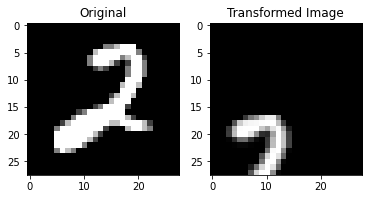

In [30]:
# width_shift_range, height_shift_range
datagen = ImageDataGenerator(
    width_shift_range = 0.5, # 왼쪽 오른쪽 랜덤으로
    height_shift_range = 0.5 # 위 아래 랜덤으로

)

# DataGenerator 거친 image
print('--- 변환 전 image shape' , image.shape)
gen_image = next(iter(datagen.flow(image)))
print('--- 변환 후 image shape' , gen_image.shape)

plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(image), 'gray')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(gen_image),'gray')

--- 변환 전 image shape (1, 28, 28, 1)
--- 변환 후 image shape (1, 28, 28, 1)


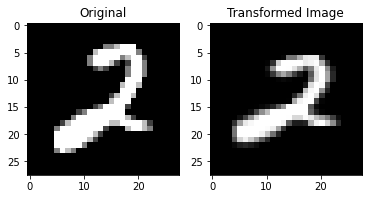

In [37]:
# zoom_range, brightness_range
datagen = ImageDataGenerator(
    zoom_range=0.4, # 0.4배 커졌다, 작아졌다
    brightness_range = [0.3, 0.7]
)

# DataGenerator 거친 image
print('--- 변환 전 image shape' , image.shape)
gen_image = next(iter(datagen.flow(image)))
print('--- 변환 후 image shape' , gen_image.shape)

plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(image), 'gray')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(gen_image),'gray')

--- 변환 전 image shape (1, 28, 28, 1)
--- 변환 후 image shape (1, 28, 28, 1)


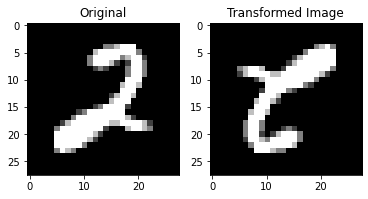

In [45]:
# horizontal_flip, vrtical_flip
datagen = ImageDataGenerator(
    horizontal_flip=True, # 좌, 우 뒤집기
    vertical_flip = True, # 상, 하 뒤집기
)

# DataGenerator 거친 image
print('--- 변환 전 image shape' , image.shape)
gen_image = next(iter(datagen.flow(image)))
print('--- 변환 후 image shape' , gen_image.shape)

plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(image), 'gray')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(gen_image),'gray')

## Rescale시 주의사항
- Train에게 실수형으로 바꿔주거나 normalize 등을 했으면 Test 경우도 Rescale 적용 필용 해주어야 함
- flip, rotation, zoom 등은 Test경우에 해줄 필요없음

In [47]:
# Rescale
train_datagen = ImageDataGenerator(
    zoom_range = 0.7,
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255.
)